In [48]:
# reading a CSV file as a dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

loan_df=pd.read_csv(r"C:/upgrad/assignment2/loan.csv")
loan_df.head()  #data Understanding 
#print("Test")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [49]:
loan_df.shape


(39717, 111)

In [50]:
#looking at the columns of data 
loan_df.columns  
#Data Cleaning  by checking number of missing values in each column
print(round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [51]:
#Remove the columns that have all null values
loan_df = loan_df.dropna( axis=1, how="all")

# Drop Columns mths_since_last_record and next_pymnt_d that have more than 90% of values as null
loan_df = loan_df.drop(['mths_since_last_record','next_pymnt_d'], axis=1)

# Drop the columns that are not required
# url desc  acc_now_delinq chargeoff_within_12_mths delinq_amnt tax_liens ,collections_12_mths_ex_med ,policy_code ,emp_title 
# pymnt_plan ,earliest_cr_line ,pub_rec initial_list_status, out_prncp , out_prncp_inv, pub_rec_bankruptcies, total_rec_late_fee
#,recoveries ,collection_recovery_fee , last_pymnt_amnt 

unwanted_columns = ['url','desc','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens' ,'emp_title'
                    ,'collections_12_mths_ex_med' ,'policy_code','pymnt_plan','earliest_cr_line','pub_rec','recoveries'
                    ,'initial_list_status','out_prncp','out_prncp_inv','pub_rec_bankruptcies','total_rec_late_fee'
                    ,'collection_recovery_fee','last_pymnt_amnt']

loan_df = loan_df.drop(unwanted_columns, axis=1)

#int_rate is of object type , so lete convert it to float
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x:pd.to_numeric(x.split("%")[0]))


loan_df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,Jan-15,May-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,Apr-13,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,Jun-14,May-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,Apr-16,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39,May-16,May-16,INDIVIDUAL


In [55]:
# Remove the Rows that have the values of loan_status as Current
loan_df = loan_df[loan_df['loan_status'] != 'Current']
#Get new column out from loan_status where 0 as 'Fully Paid' and 1 as 'Charged Off'
loan_df['loan_status'] = loan_df['loan_status'].apply({'Fully Paid':0, 'Charged Off':1}.get)

#emp_length is critical we need to do some data cleaning to get the length in actual integers
# First Convert the null values to zero 0
loan_df['emp_length'].fillna('0', inplace=True)
#Using the regex just take the digit and leave rest from columns data
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x:re.findall(r'\d+',str(x))[0])
#Convert the employee length column data into numeric
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: pd.to_numeric(x))
#Analyse the emp_length columns to get Median and max Min and Mode of the data
print('Describe emp_length ',  loan_df['emp_length'].describe())
print('median of emp_length ',loan_df['emp_length'].median())
#Replace the value with mean
loan_df.loc[(loan_df['emp_length'] == 0) ,'emp_length'] = loan_df['emp_length'].mean()



Describe emp_length  count    38577.000000
mean         4.925526
std          3.453921
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64
median of emp_length  4.0


In [56]:
# Describe the mths_since_last_delinq    column
print(loan_df.mths_since_last_delinq.describe())
#Median of mths_since_last_delinq      columns
print(loan_df.mths_since_last_delinq.median())
#Fill the vlaue of mths_since_last_delinq columns with zero as this is important column loan_df
loan_df['mths_since_last_delinq'].fillna(loan_df.mths_since_last_delinq.mean(), inplace=True)


count    38577.000000
mean        35.894431
std         13.113498
min          0.000000
25%         35.900962
50%         35.900962
75%         35.900962
max        120.000000
Name: mths_since_last_delinq, dtype: float64
35.90096188101175


In [57]:
#Data Cleaning  by checking number of missing values in each column
print(round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2))


id                        0.00
member_id                 0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_length                0.00
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
purpose                   0.00
title                     0.03
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
inq_last_6mths            0.00
mths_since_last_delinq    0.00
open_acc                  0.00
revol_bal                 0.00
revol_util                0.13
total_acc                 0.00
total_pymnt               0.00
total_pymnt_inv           0.00
total_rec_prncp           0.00
total_rec_int             0.00
last_pym

In [58]:
print("loan_status_new : ",loan_df.loan_status.unique())
print("emp_length : ",loan_df.emp_length.unique())
#loan_df['emp_length']

loan_status_new :  [0 1]
emp_length :  [10.          1.          3.          8.          9.          4.
  5.          6.          2.          7.          4.92552557]


In [59]:

# write rounds file
loan_df.to_csv("C:/upgrad/assignment2/loan_clean.csv", sep=',', index=False)

#check whether some rows have more than 5 values missing
loan_df[loan_df.isnull().sum(axis=1) >5].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_credit_pull_d,application_type


In [47]:
#it indicates data is clean now and we can see the arrangements of data whether all the columns have clearly assigned or in format
data = pd.read_csv("C:/upgrad/assignment2/loan_clean.csv")
#Remove Dublicate data if any
data = data.drop_duplicates() 
print("Purpose : ",data.purpose.unique())

print("loan_status : ",data.loan_status.unique())
data['amt_diff'] = data['loan_amnt'] - data['funded_amnt']
data.describe(percentiles=[.05,.10,.20,.30,.40,.50,.60,.70,.80,.90,.95])

Purpose :  ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
loan_status :  [0 1]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,...,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,amt_diff
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,...,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,11.932219,322.466318,5.057419,6.877797e+04,0.145864,...,0.871737,35.882534,9.275423,13289.489826,22.052648,11866.970365,11271.196153,9648.322898,2119.243370,262.966923
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,3.691327,208.639215,3.355966,6.421868e+04,0.352975,...,1.071546,13.113495,4.401588,15866.492241,11.425861,8809.856227,8700.845592,7009.381200,2389.499511,1401.518330
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,...,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,3.710014e+05,3.858452e+05,2400.000000,2400.000000,1800.000000,6.170000,70.610000,1.000000,2.400000e+04,0.000000,...,0.000000,11.000000,3.000000,312.000000,7.000000,1856.441084,1380.822000,1300.000000,182.740000,0.000000
10%,4.244362e+05,4.972022e+05,3090.000000,3000.000000,2825.000000,7.140000,98.990000,1.000000,3.000000e+04,0.000000,...,0.000000,20.000000,4.000000,1099.000000,9.000000,2915.916752,2415.198000,2136.398000,309.522000,0.000000
20%,4.864360e+05,6.191706e+05,5000.000000,5000.000000,4375.000000,7.900000,149.922000,2.000000,3.719616e+04,0.000000,...,0.000000,35.882534,6.000000,2787.000000,12.000000,4689.046513,4176.844000,3766.000000,531.612000,0.000000
30%,5.405632e+05,6.973934e+05,6000.000000,6000.000000,5600.000000,9.990000,186.060000,2.000000,4.450000e+04,0.000000,...,0.000000,35.882534,7.000000,4569.000000,15.000000,6118.451114,5697.594000,5000.000000,755.204000,0.000000
40%,6.008364e+05,7.709758e+05,7750.000000,7500.000000,7000.000000,10.990000,228.710000,3.000000,5.000400e+04,0.000000,...,0.000000,35.882534,8.000000,6528.000000,18.000000,7720.566404,7174.698000,6250.000000,1000.500000,0.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,11.710000,277.860000,4.000000,5.886800e+04,0.000000,...,1.000000,35.882534,9.000000,8762.000000,20.000000,9674.048405,9066.660000,8000.000000,1300.450000,0.000000


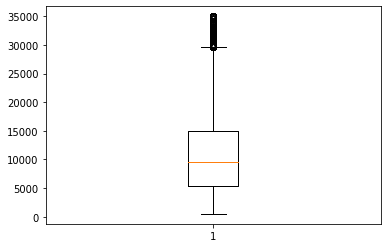

In [60]:
# Boxplot: Visualise the distribution of a continuous variable
plt.boxplot(data['loan_amnt'])
plt.show()

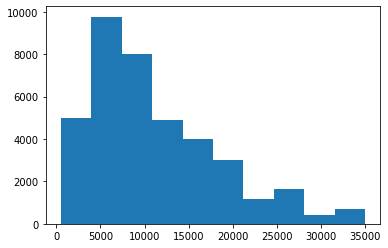

In [61]:
plt.hist(data['loan_amnt'])
#plt.yscale('log')
plt.show()

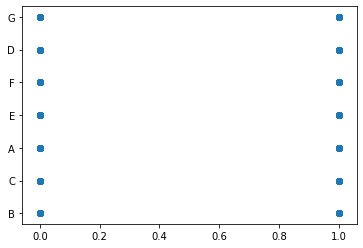

In [62]:
# Scatter plots with two variables: Profit and Sales
plt.scatter(data['loan_status'], data['grade'])
plt.show()

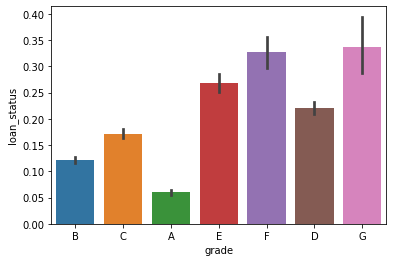

In [63]:
#plotting default rates across different grades of loan
sns.barplot(x='grade',y='loan_status',data=data)

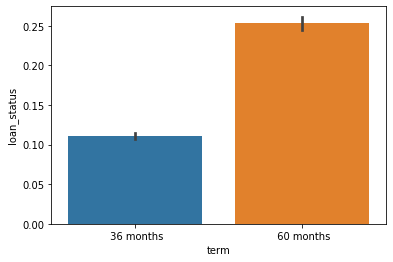

In [64]:
#plotting barplots with different categorical variables to derive a conclusion on them
sns.barplot(x='term',y='loan_status',data=data) 



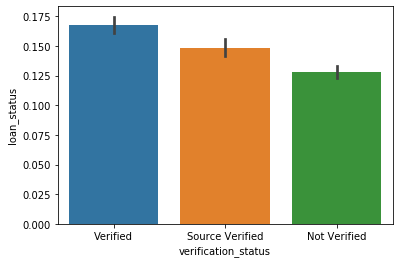

In [65]:
# here verified loans are more default than unverified ones
sns.barplot(x='verification_status',y='loan_status',data=data) 

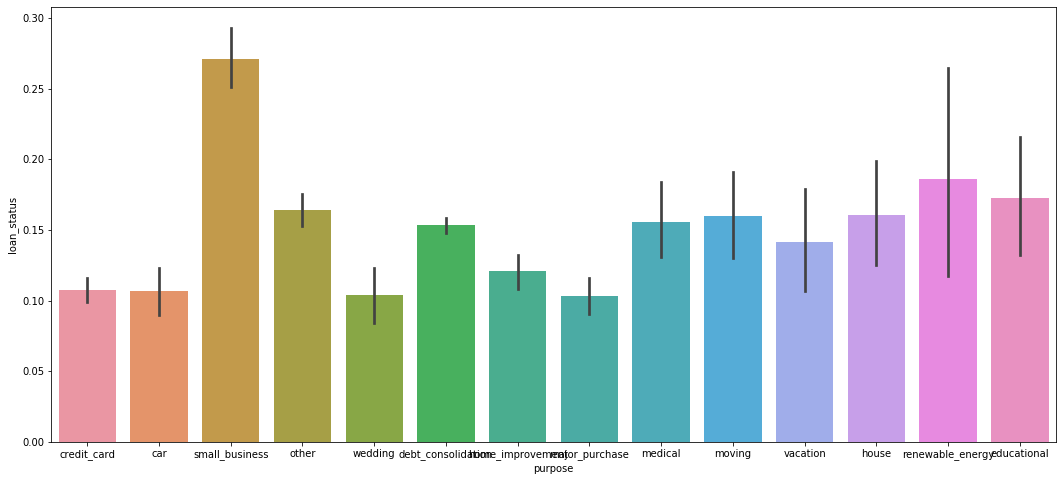

In [66]:
#check for different purpose and based on these we can get some more conclusion
plt.figure(figsize=(18,8))
sns.barplot(x='purpose',y='loan_status',data=data)

In [ ]:
#from above graph we can see that Small_business loans goes for more defaulters list

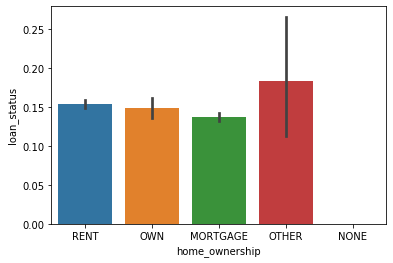

In [67]:
#plotting for home_ownership categorical variable
#home_ownership with other goes default more than Rent/own/morgage
sns.barplot(x='home_ownership',y='loan_status',data=data)


In [ ]:
# From above plot we can say the people that have home_ownership as others are more likely to default 

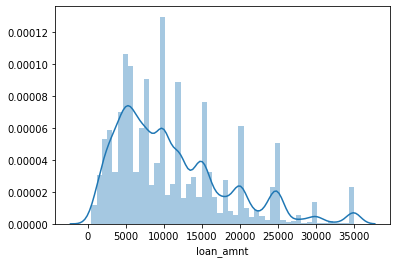

In [68]:
#based on loan amount we can get a conclusion about the loan_amount versus defaulters .
sns.distplot(data['loan_amnt'])

In [69]:
#classify loan amount as very low,low,medium and high , very high
def loan_amnt(data):
    if (data<5000):
        return 'very low'
    elif (data >=5000 and data <=15000):
        return 'low'
    elif (data>=15000 and data <=25000):
        return 'medium'
    elif (data>=25000 and data <=35000):
        return 'high'
    else:
        return 'very high'
data['loan_amnt'] = data['loan_amnt'].apply(lambda x:loan_amnt(x))

In [70]:
data['loan_amnt'].count()


38577

In [71]:
data['loan_amnt'].value_counts()

low         22513
very low     7444
medium       7185
high         1435
Name: loan_amnt, dtype: int64

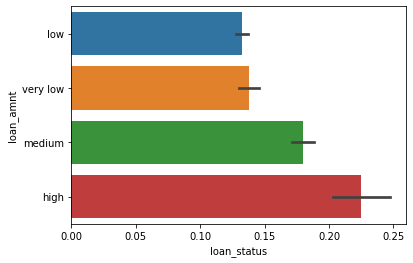

In [23]:
sns.barplot(x='loan_status',y='loan_amnt',data=data)

In [24]:
#so from above graph we can conclude that  higher the loan amount higher the default rate

In [72]:
# calculating risk of defaulters based on installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
data['installment'] = data['installment'].apply(lambda x: installment(x))

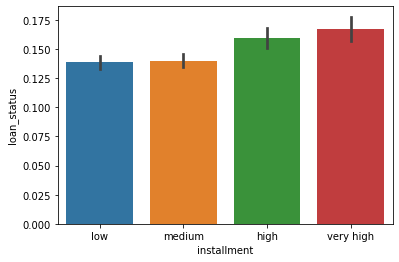

In [73]:
sns.barplot(x='installment',y='loan_status',data=data)

In [ ]:
# Based on above graph , it states that hogher the installments higher default rates

In [74]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

data['annual_inc'] = data['annual_inc'].apply(lambda x: annual_income(x))

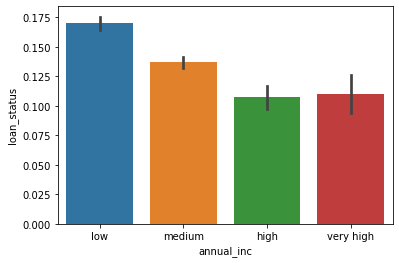

In [75]:
sns.barplot(x='annual_inc',y='loan_status',data=data)

In [ ]:
# From above graph we can say that lower the annual income , higher the default rate

In [76]:
#calculating risk of defaulters for dti
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    
data['dti'] = data['dti'].apply(lambda x: dti(x))

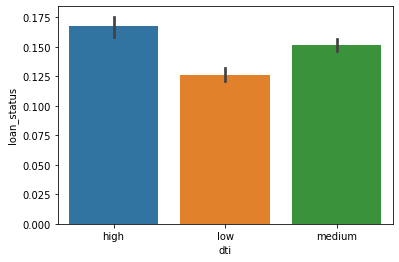

In [77]:
sns.barplot(x='dti',y='loan_status',data=data)

In [ ]:
#From above graph we can say that higher the dti values , higher default rate

In [79]:
# Bi Variate Analysis

f = plt.figure(figsize=(19, 15))

#data_by =  data[['member_id','loan_status','loan_amnt','funded_amnt_inv','int_rate','emp_length','loan_status','loan_amnt']]
corr = data.corr(method ='pearson') 
corr.style.background_gradient(cmap='coolwarm')

,id,member_id,funded_amnt,funded_amnt_inv,int_rate,emp_length,loan_status,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,amt_diff
id,1,0.993534,0.131283,0.231603,0.0539364,0.10627,0.0423896,-0.00841695,-0.0410212,0.0745311,0.0162563,0.00135664,0.0399024,0.110432,0.194832,0.0929786,0.123268,-0.0317634
member_id,0.993534,1,0.130307,0.241324,0.0508076,0.11092,0.039798,-0.00790501,-0.045879,0.0792847,0.0138037,-0.00198254,0.0422172,0.11181,0.205195,0.0937728,0.12666,-0.0279785
funded_amnt,0.131283,0.130307,1,0.956172,0.30493,0.146442,0.0564973,-0.0318661,0.0128569,0.00916515,0.175682,0.306501,0.250551,0.898709,0.864501,0.864082,0.736654,0.0887022
funded_amnt_inv,0.231603,0.241324,0.956172,1,0.297473,0.157286,0.037781,-0.0381712,-0.00280027,0.0422362,0.162738,0.286265,0.242715,0.87473,0.909127,0.838587,0.726736,0.0804238
int_rate,0.0539364,0.0508076,0.30493,0.297473,1,-0.000261171,0.21139,0.158479,0.133362,-0.0304772,0.00602205,0.0941787,-0.046539,0.290661,0.284932,0.174717,0.521233,0.0369479
emp_length,0.10627,0.11092,0.146442,0.157286,-0.000261171,1,0.0161047,0.0152844,0.0103863,0.0283523,0.0953132,0.1506,0.205678,0.129924,0.140187,0.121542,0.114827,0.028667
loan_status,0.0423896,0.039798,0.0564973,0.037781,0.21139,0.0161047,1,0.0200958,0.0718778,0.00329648,-0.00914023,0.00585386,-0.0226076,-0.235898,-0.232906,-0.334944,0.0130083,0.0259535
delinq_2yrs,-0.00841695,-0.00790501,-0.0318661,-0.0381712,0.158479,0.0152844,0.0200958,1,0.00873341,-0.519692,0.0116486,-0.0544373,0.0669943,-0.0231298,-0.029608,-0.0384471,0.0237777,-0.00631671
inq_last_6mths,-0.0410212,-0.045879,0.0128569,-0.00280027,0.133362,0.0103863,0.0718778,0.00873341,1,-0.00338314,0.0934343,-0.020787,0.113516,-0.0082439,-0.0185889,-0.0213279,0.0265492,0.00280341
mths_since_last_delinq,0.0745311,0.0792847,0.00916515,0.0422362,-0.0304772,0.0283523,0.00329648,-0.519692,-0.00338314,1,0.0153823,0.00751317,0.00589319,0.00736634,0.0350492,0.00876606,0.00297198,0.000151528


<Figure size 1368x1080 with 0 Axes>